In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df=pd.read_csv("titanic_train.csv")

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

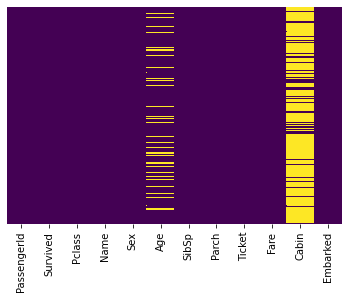

In [31]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

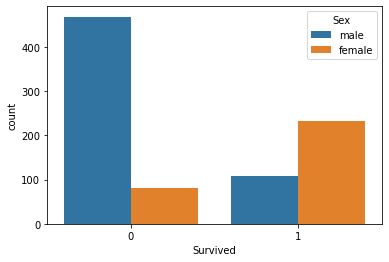

In [32]:
sns.countplot(data=df,x='Survived',hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

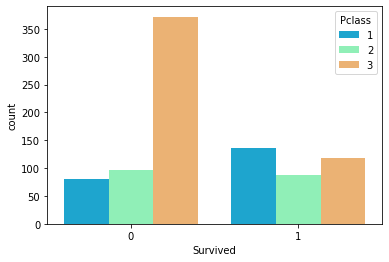

In [33]:
sns.countplot(data=df,x='Survived',hue='Pclass',palette='rainbow')

## Data Cleaning

In [34]:
df_2=df.fillna(method='bfill',axis=0).fillna(0)

<AxesSubplot:>

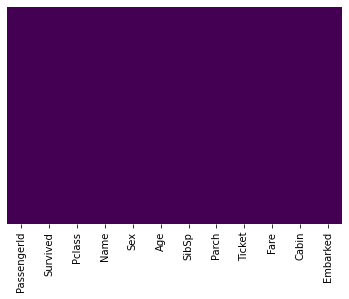

In [35]:
sns.heatmap(df_2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
df_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S


In [37]:
df_2.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)

In [38]:
df_2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [39]:
sex=pd.get_dummies(df_2['Sex'],drop_first=True)
emb=pd.get_dummies(df_2['Embarked'],drop_first=True)

In [40]:
df_2.drop(['Sex','Embarked'],axis=1,inplace=True)

In [41]:
df_2= pd.concat([df_2,sex,emb],axis=1)

In [42]:
df_2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X=df_2.drop('Survived',axis=1)

In [45]:
y=df_2['Survived']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
LR=LogisticRegression()

In [49]:
LR.fit(X_train,y_train)

C:\Users\Vanshika Nehra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
pred = LR.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       154
           1       0.80      0.61      0.69       114

    accuracy                           0.77       268
   macro avg       0.78      0.75      0.75       268
weighted avg       0.77      0.77      0.76       268



In [53]:
print(confusion_matrix(y_test,pred))

[[136  18]
 [ 44  70]]


## KNN



In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler=StandardScaler()

In [56]:
scaler.fit(X_train,y_train)

StandardScaler()

In [73]:
scaled_features = scaler.transform(X)

In [74]:
df_feat = pd.DataFrame(scaled_features,columns=df_2.columns[:].drop('Survived'))
df_feat.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,-1.735803,0.819367,-0.534014,0.380731,-0.484325,-0.532858,0.736260,-0.301775,0.617555
1,-1.731919,-1.594183,0.588656,0.380731,-0.484325,0.895422,-1.358215,-0.301775,-1.619288
2,-1.728035,0.819367,-0.253346,-0.491310,-0.484325,-0.517802,-1.358215,-0.301775,0.617555
3,-1.724151,-1.594183,0.378155,0.380731,-0.484325,0.489838,-1.358215,-0.301775,0.617555
4,-1.720267,0.819367,0.378155,-0.491310,-0.484325,-0.515014,0.736260,-0.301775,0.617555


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df_2['Survived'],test_size=0.30)

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn = KNeighborsClassifier(n_neighbors=1)

In [79]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [80]:
pred = knn.predict(X_test)

In [81]:
from sklearn.metrics import classification_report,confusion_matrix

In [82]:
print(confusion_matrix(y_test,pred))

[[132  35]
 [ 30  71]]


In [83]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       167
           1       0.67      0.70      0.69       101

    accuracy                           0.76       268
   macro avg       0.74      0.75      0.74       268
weighted avg       0.76      0.76      0.76       268



In [84]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

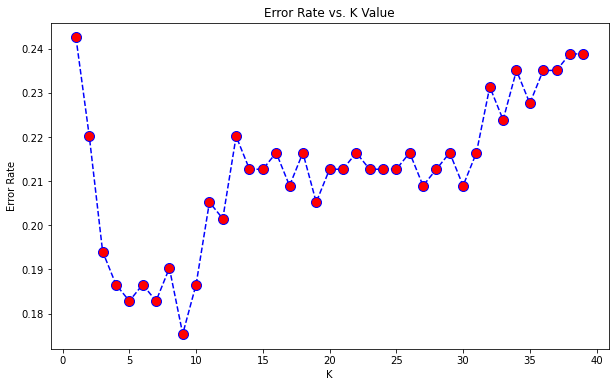

In [85]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [91]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('WITH K=9')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=9


[[152  15]
 [ 32  69]]


              precision    recall  f1-score   support

           0       0.83      0.91      0.87       167
           1       0.82      0.68      0.75       101

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



## SVM

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [95]:
from sklearn.svm import SVC

In [96]:
svc=SVC()

In [97]:
svc.fit(X_train,y_train)

SVC()

In [98]:
pred=svc.predict(X_test)

In [99]:
print(confusion_matrix(y_test,pred))

[[169   6]
 [108  12]]


In [100]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.61      0.97      0.75       175
           1       0.67      0.10      0.17       120

    accuracy                           0.61       295
   macro avg       0.64      0.53      0.46       295
weighted avg       0.63      0.61      0.51       295



## Grid Search

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

In [103]:
gs=GridSearchCV(SVC(),param_grid,verbose=2)
gs.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ............................... C=100, gamma=0.001, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.2s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [104]:
pred=gs.predict(X_test)

In [105]:
print(confusion_matrix(y_test,pred))

[[166   9]
 [ 96  24]]


In [106]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.63      0.95      0.76       175
           1       0.73      0.20      0.31       120

    accuracy                           0.64       295
   macro avg       0.68      0.57      0.54       295
weighted avg       0.67      0.64      0.58       295



## Decision Tree Classifier

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
dtree=DecisionTreeClassifier()

In [109]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [110]:
pred=dtree.predict(X_test)

In [111]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       175
           1       0.74      0.68      0.71       120

    accuracy                           0.77       295
   macro avg       0.77      0.76      0.76       295
weighted avg       0.77      0.77      0.77       295



In [112]:
print(confusion_matrix(y_test,pred))

[[146  29]
 [ 38  82]]


## Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
RF=RandomForestClassifier()

In [115]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [116]:
pred=RF.predict(X_test)

In [117]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       175
           1       0.85      0.66      0.74       120

    accuracy                           0.81       295
   macro avg       0.82      0.79      0.80       295
weighted avg       0.82      0.81      0.81       295



In [118]:
print(confusion_matrix(y_test,pred))

[[161  14]
 [ 41  79]]


In [119]:
def count(x):
    if x==1:
        return 1
    else:
        return 0

In [120]:
total_survivers=df_2['Survived'].apply(count)

In [121]:
total_survivers.sum()
#Total Number of Survivers

342

In [122]:
def count_male_survivers(cols):
    M=cols[0]
    S=cols[1]
    if M==1 and S==1:
        return 1
    else:
        return 0
    
    
male_survivers=df_2[['male','Survived']].apply(count_male_survivers,axis=1)

In [123]:
male_survivers.sum()
# Male Survivers

109

In [124]:
female_survivers=total_survivers-male_survivers
female_survivers.sum()
# Female Survivers

233

C:\Users\Vanshika Nehra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Male Survivers')

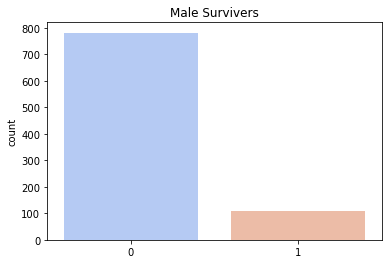

In [129]:
sns.countplot(male_survivers,palette='coolwarm')
plt.title('Male Survivers')

C:\Users\Vanshika Nehra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Female Survivers')

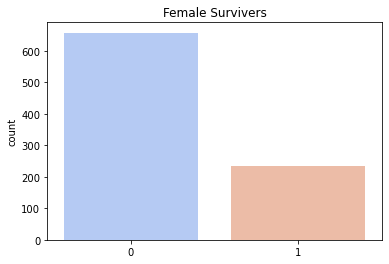

In [130]:
sns.countplot(female_survivers,palette='coolwarm')
plt.title('Female Survivers')

In [131]:
import pickle

In [132]:
filename='titanic_model'

In [133]:
pickle.dump(knn,open(filename,'wb'))

In [134]:
loaded_model=pickle.load(open(filename,'rb'))

In [135]:
result=loaded_model.score(X_test,y_test)

In [136]:
result

0.5152542372881356

In [137]:
loaded_model.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int64)